# Search: Solving a Maze Using a Goal-based Agent

**By: Braiden Hook**

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [4]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [5]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

maze.shape

Position(0,0): X
Position(8,1): G


(10, 22)

A helper function to visualize the maze is also available.

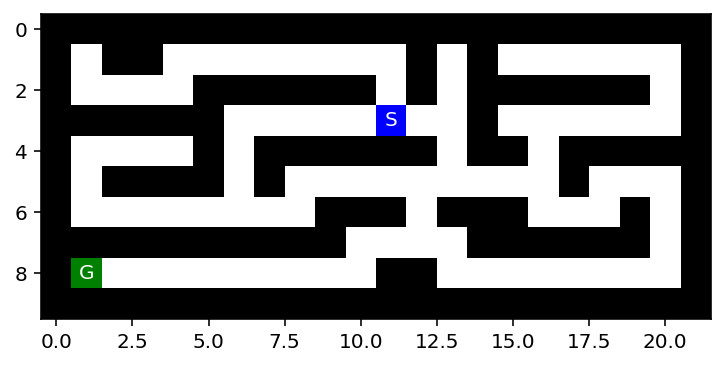

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [7]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [8]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/braidenhook/Documents/Fall22/AI/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [9]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

### Answer

- The **initial state** is the starting point on the maze that is denoted by "S" in the maze.txt file. This will come as a (row,col) point in a numpy array after loading in the file and processing it through the maze helper.

- The **actions** are north, south, east, and west. These denote the directions the robot can go in the maze.

- The **transition model** outputs set of states which is the possible resulting states based on the possible actions the machine take.

- The **goal state** is the end point on the maze that is denoted by "G" in the maze.txt file. This will come as a (row,col) point in a numpy array after loading in the file and processing it through the maze helper.

- The **path cost** is the amount of steps taken on the path. Another way of putting is the amount of nodes that will need to be visited for the robot to go from its initial node to the goal node.


Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

### Answer

- The **state space size** is the dimensions of the maze. So if the maze is size 10x10 (row, col) it will be a size 100 maze. As these mazes are not expansive, I doubt they will be beyond a size 1000 maze (100x100).

- The **depth of the optimal solution** would preferably be the max amount between the two dimensions. So if the maze was of 10 x 5, the optimal solution would be at most 10, so the robot would be able to go from one end to another.

- The **max depth of tree** would be at least half of the maze size. This is because we would rather not visit every single node in the maze. So if it was size 1000, preferably under 500 visited.

- The **maximum branching factor** would be the size of the maze minus 1. Meaning you can visit every node outside of the starting node up until you visit the goal. That wouldn't be optimal of course.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

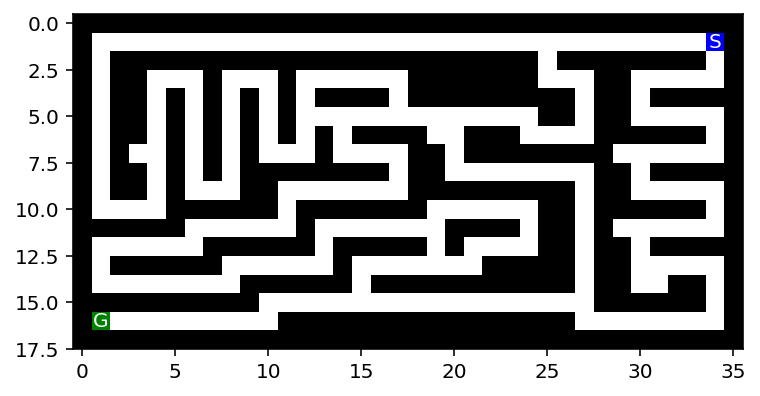

In [155]:
import copy
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

og_maze = mh.parse_maze(maze_str)
mh.show_maze(og_maze)

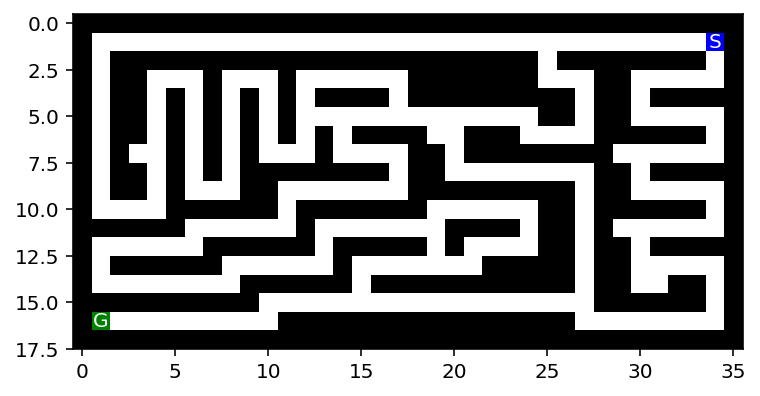

CPU times: user 5.06 ms, sys: 18 µs, total: 5.08 ms
Wall time: 5.08 ms


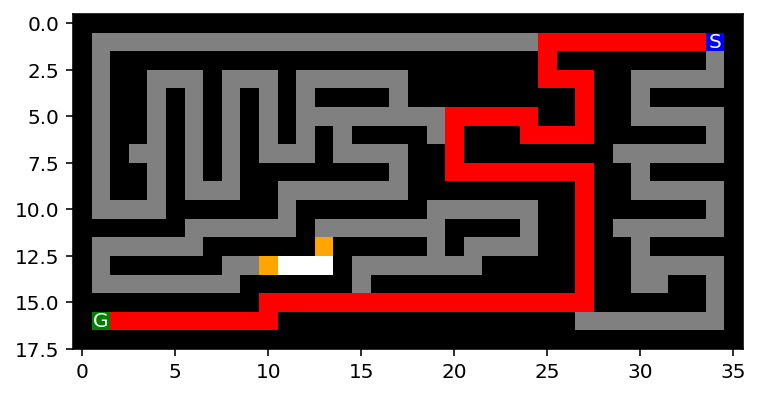

Node - pos = (16, 1); action = W; cost = 68
Start location: (1, 34)
Goal location: (16, 1)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [156]:
actions = ["N", "E", "W", "S"]

def transition (action, pos):

    pos_lst = list(pos)

    if action == "N":
        pos_lst[0] -= 1
    elif action == "E":
        pos_lst[1] += 1
    elif action == "W":
        pos_lst[1] -= 1
    else:
        pos_lst[0] += 1
    
    return pos_lst

def expand(actions, node):

    nodes = []

    s = node.pos

    for x in actions:
        new_s = transition(x, s)
        new_cost = node.cost + 1
        new_node = Node (new_s, node, x, new_cost)
        nodes.append(new_node)
    
    return nodes

def bfs(maze, actions):
    initial_state = mh.find_pos(maze, what = "S")
    goal_state = mh.find_pos(maze, what = "G")

    initial_node = Node(initial_state, None, None, 0)

    if initial_node.pos == goal_state:
        return initial_node

    frontier = [initial_node]
    reached = [initial_node.pos]

    max_front_size = 0
    max_reached = 0
    max_depth = 0
    nodes_expanded = 0

    while frontier:

        max_front_size = max(max_front_size, len(frontier))
        max_reached = max(max_reached, len(reached))

        node = frontier.pop(0)

        max_depth = max(max_depth, len(node.get_path_from_root()))

        if maze[node.pos[0]][node.pos[1]] != "G" and maze[node.pos[0]][node.pos[1]] != "S":
            maze[node.pos[0]][node.pos[1]] = "."
        
        nodes_expanded += 1

        for child in expand(actions, node):

            s = child.pos
            if mh.look(maze, s) != "X":
                if mh.look(maze, s) == "G":
                    # for f in frontier:
                    #     maze[f.pos[0]][f.pos[1]] = "F"
                    return child, max_front_size, max_reached, max_depth, nodes_expanded

                if s not in reached:
                    frontier.append(child)
                    reached.append(s)
                    maze[s[0]][s[1]] = "F"
        # mh.show_maze(maze)
    return "failure"


maze = copy.deepcopy(og_maze)
mh.show_maze(maze)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = bfs(maze, actions)


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
        maze[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze)

print(goal)
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

print(path)

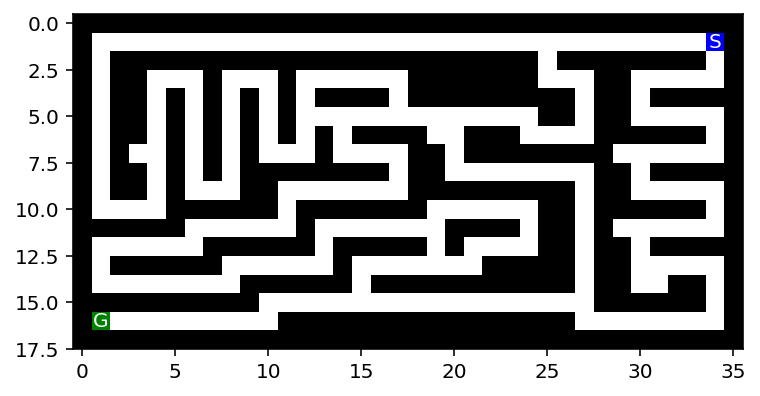

CPU times: user 11.3 ms, sys: 45 µs, total: 11.4 ms
Wall time: 11.4 ms


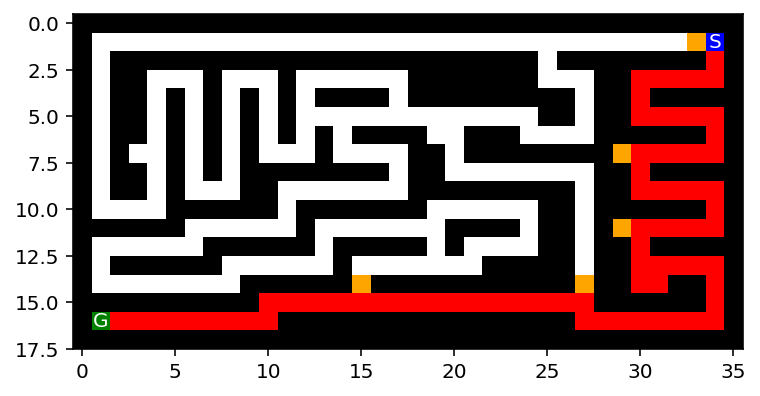

Node - pos = (16, 1); action = W; cost = 76
Start location: (1, 34)
Goal location: (16, 1)
[None, 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [157]:
def dfs(maze, actions, cutoff):
    initial_state = mh.find_pos(maze, what = "S")
    goal_state = mh.find_pos(maze, what = "G")

    initial_node = Node(initial_state, None, None, 0)

    result = "Failure"

    frontier = [initial_node]

    count = 0

    max_front_size = 0
    max_reached = 0
    max_depth = 0
    nodes_expanded = 0

    while frontier:

        max_front_size = max(max_front_size, len(frontier))
        # max_front_size = max(max_reached, len(frontier))

        node = frontier.pop()
        max_depth = max(max_depth, len(node.get_path_from_root()))

        if mh.look(maze, node.pos) == "G":
            return node, max_front_size, len(node.get_path_from_root()), max_depth, nodes_expanded
        
        if len(node.get_path_from_root()) > cutoff:
                result = "cutoff"

        exists = False
        for x in node.get_path_from_root()[:-1]:
            if x.pos == node.pos:
                exists = True
                break

        if not exists:

            nodes_expanded += 1
            for child in expand(actions, node):
                s = child.pos
                if mh.look(maze, s) != "X":
                        frontier.append(child)
                        if mh.look(maze, s) != "S" and mh.look(maze, s) != "G":
                            maze[s[0]][s[1]] = "F"

        # print (frontier)

        for x in node.get_path_from_root()[1:]:
            if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
                maze[x.pos[0]][x.pos[1]] = "."

        # mh.show_maze(maze)
        # print(maze)

        for x in node.get_path_from_root()[1:]:
            if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
                maze[x.pos[0]][x.pos[1]] = " "

        count = 1

    return result

maze = copy.deepcopy(og_maze)
# print (maze)
mh.show_maze(maze)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = dfs(maze, actions, 1000)


path = []

if isinstance(goal, Node):
    for x in goal.get_path_from_root():
        path.append(x.action)
        if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
            maze[x.pos[0]][x.pos[1]] = "P"

# print (maze)

mh.show_maze(maze)

print(goal)
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

print(path)

How does BFS and DFS deal with loops (cycles)?

### Discussion

BFS loops around the frontier expanding each node one by one until it reaches the goal state. Whereas DFS takes one frontier and continues to expand it until it reaches the goal state or it no longer can (loops back into itself). Once it finds out it can expand no longer it deletes that path and expands on a new frontier. While DFS sounds optimal initially as it doesn't have to expand on multiple frontiers, this isn't necessarily the case as if it goes in the wrong direction, it will take the algo far longer to complete than BFS.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

### Discussion

The implementations are complete, I haven't run into any errors regarding them. However, are they optimal? No. They visit far to many unecessary nodes and create a far too long inefficient algo. I believe the implementation of BFS is of O(R+F) for both time and space which is the basically the frontier and the nodes stored in memory. DFS however is O(F+P) for the space as it takes only in the path and the frontier and deletes the rest of the previous path used in memory. It is O(N) for the time as it could explore every node in the maze.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

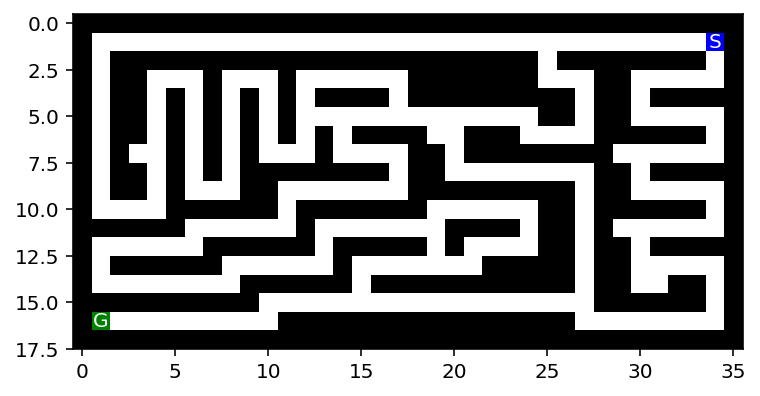

CPU times: user 3.29 ms, sys: 90 µs, total: 3.38 ms
Wall time: 3.37 ms


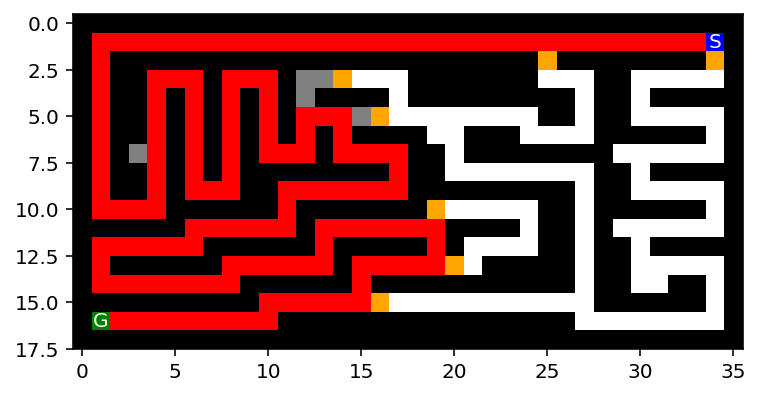

Node - pos = (16, 1); action = W; cost = 152
Start location: (1, 34)
Goal location: (16, 1)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [158]:
def informed_search(maze, actions, type="bfs"):
    initial_state = mh.find_pos(maze, what = "S")
    goal_state = mh.find_pos(maze, what = "G")

    initial_node = Node(initial_state, None, None, 0)

    if initial_node.pos == goal_state:
        return initial_node

    frontier = [initial_node]
    reached = {initial_node.pos:initial_node}
    max_front_size = 0
    max_reached = 0
    max_depth = 0
    nodes_expanded = 0

    while frontier:

        max_front_size = max(max_front_size, len(frontier))
        max_reached = max(max_reached, len(reached))

        # t = []
        # for x in frontier:
        #     t.append(x.pos)

        if type == "bfs":
            frontier = sorted(frontier, key= lambda x: (abs(x.pos[0] - goal_point[0]) + abs(x.pos[1] - goal_point[1])))
        else:
            frontier = sorted(frontier, key= lambda x: ((abs(x.pos[0] - goal_point[0]) + abs(x.pos[1] - goal_point[1])) + x.cost))

        # test = []
        # for x in frontier:
        #     test.append(x.pos)

        # print ("original:")
        # print (t)
        # print ("sorted:")
        # print(test)

        node = frontier.pop(0)

        max_depth = max(max_depth, len(node.get_path_from_root()))

        if mh.look(maze, node.pos) == "G":
            return node, max_front_size, max_reached, max_depth, nodes_expanded

        if maze[node.pos[0]][node.pos[1]] != "G" and maze[node.pos[0]][node.pos[1]] != "S":
            maze[node.pos[0]][node.pos[1]] = "."
        
        nodes_expanded += 1

        for child in expand(actions, node):

            s = child.pos
            if mh.look(maze, s) != "X":
                # if mh.look(maze, s) == "G":
                #     # for f in frontier:
                #     #     maze[f.pos[0]][f.pos[1]] = "F"
                #     return child

                if s not in reached or child.cost < reached[s].cost:
                    reached[s] = child
                    frontier.append(child)
                    if mh.look(maze, s) != "S" and mh.look(maze, s) != "G":
                        maze[s[0]][s[1]] = "F"
        #mh.show_maze(maze)
    return "failure"

maze = copy.deepcopy(og_maze)
mh.show_maze(maze)

goal_point = mh.find_pos(maze, what = "G")

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze, actions)


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
        maze[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze)

print(goal)
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

print(path)

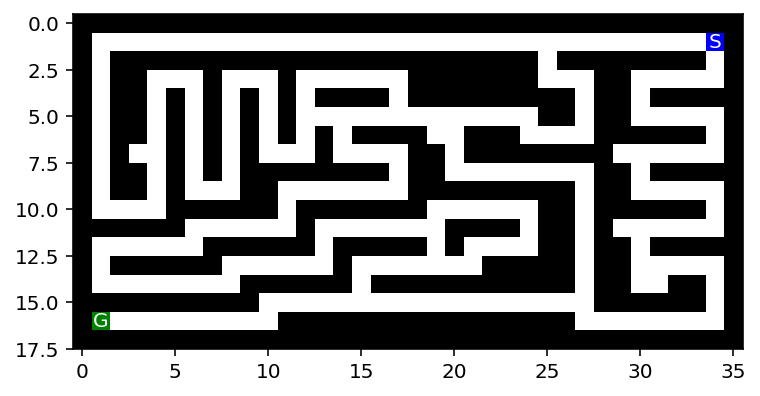

CPU times: user 4 ms, sys: 187 µs, total: 4.18 ms
Wall time: 4.14 ms


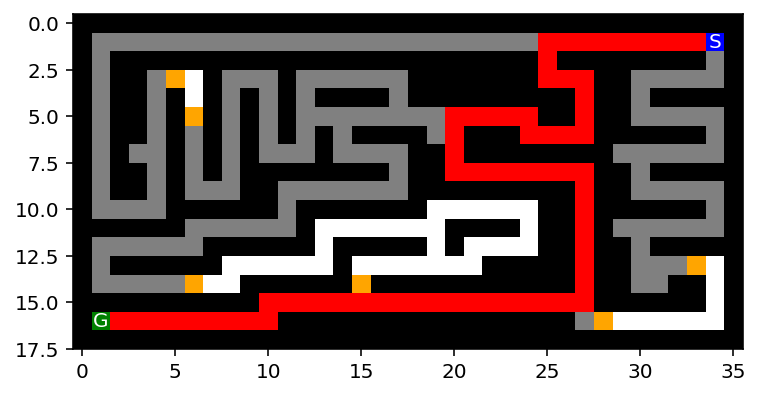

Node - pos = (16, 1); action = W; cost = 68
Start location: (1, 34)
Goal location: (16, 1)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [159]:
maze = copy.deepcopy(og_maze)
mh.show_maze(maze)

goal_point = mh.find_pos(maze, what = "G")

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze, actions, "a-star")


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze[x.pos[0]][x.pos[1]] != "G" and maze[x.pos[0]][x.pos[1]] != "S":
        maze[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze)

print(goal)
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

print(path)

Are your implementations complete and optimal? What is the time and space complexity?

The implementations of GBS and A* are far more optimal than BFS and DFS. This is becasue it focuses solely on the heuristic values in the maze to map a path. This takes out any unnecessary visited nodes which is what we desired in comparison to BFS which went and visited every node no matter whether or not it was in the right direction. The time and space complexity of both is O(R) which is basically the amount of nodes the robots visited and stored in memory.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [143]:
# Add code
# Import Module
import time
import os
import pandas as pd
  
# Folder Path
path = "/Users/braidenhook/Documents/Fall22/AI/CS7320-AI/Search"
  
# Change the directory
os.chdir(path)

all_dfs = {}
  
# Read text File
  
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()

  
  
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        df = pd.DataFrame(columns=["algorithm", "path cost", "# of nodes expanded", "max tree depth",
                                   "max # of nodes in memory", "max frontier size", "time spent (ms)"])

        maze_str = read_text_file(file_path)
        og_maze = mh.parse_maze(maze_str)
        maze = copy.deepcopy(og_maze)
        # mh.show_maze(maze)

        # goal_point = mh.find_pos(maze, what = "G")

        start = time.time()
        goal, max_front_size, max_reached, max_depth, nodes_expanded = bfs(maze, actions)
        end = time.time()

        df.loc[0] = ["bfs", goal.cost, nodes_expanded, max_depth, max_reached, max_front_size, round((end - start)*1000, 2)]

        maze = copy.deepcopy(og_maze)

        start = time.time()
        goal, max_front_size, max_reached, max_depth, nodes_expanded = dfs(maze, actions, 1000)
        end = time.time()

        df.loc[1] = ["dfs", goal.cost, nodes_expanded, max_depth, max_reached, max_front_size, round((end - start)*1000,2)]

        maze = copy.deepcopy(og_maze)
        goal_point = mh.find_pos(maze, what = "G")

        start = time.time()
        goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze, actions)
        end = time.time()
        # print(end)

        df.loc[2] = ["GBS", goal.cost, nodes_expanded, max_depth, max_reached, max_front_size, round((end - start)*1000, 2)]

        maze = copy.deepcopy(og_maze)

        start = time.time()
        goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze, actions, "a-star")
        end = time.time()

        df.loc[3] = ["A*", goal.cost, nodes_expanded, max_depth, max_reached, max_front_size, round((end - start)*1000, 2)]
        
        print(file[:-4].upper())
        display(df)

        all_dfs[file[:-4].upper()] = df


SMALL_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,19,90,19,92,9,3.93
1,dfs,29,39,30,30,27,3.46
2,GBS,29,39,30,44,5,1.93
3,A*,19,53,20,59,8,0.85


OPEN_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,54,681,54,683,23,30.35
1,dfs,146,146,147,147,245,65.95
2,GBS,54,937,58,275,69,31.66
3,A*,54,535,55,555,23,10.67


MEDIUM_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,68,268,68,270,8,5.20
1,dfs,76,76,77,77,70,12.40
2,GBS,152,157,153,165,8,3.26
3,A*,68,222,69,228,8,3.72


EMPTY_2_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,14,92,14,95,11,1.48
1,dfs,18,18,19,19,43,0.97
2,GBS,14,14,15,43,29,0.34
3,A*,14,63,15,94,31,1.36


L_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,14,135,14,141,18,2.62
1,dfs,136,136,137,137,174,74.44
2,GBS,20,23,21,48,25,0.45
3,A*,14,42,15,66,24,0.80


LARGE_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,210,619,210,622,9,21.56
1,dfs,210,367,211,211,151,207.88
2,GBS,210,454,211,479,25,10.09
3,A*,210,549,211,557,12,12.04


LOOPS_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,23,70,23,71,8,0.96
1,dfs,27,30,28,28,20,2.69
2,GBS,23,76,24,61,10,1.09
3,A*,23,59,24,62,6,0.84


WALL_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,14,85,14,88,11,1.30
1,dfs,72,72,73,73,91,22.03
2,GBS,14,14,15,43,29,0.33
3,A*,14,56,15,87,31,1.26


EMPTY_MAZE


,algorithm,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size,time spent (ms)
0,bfs,14,92,14,95,12,1.46
1,dfs,88,88,89,89,117,34.60
2,GBS,14,14,15,43,29,0.33
3,A*,14,63,15,94,31,1.35


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

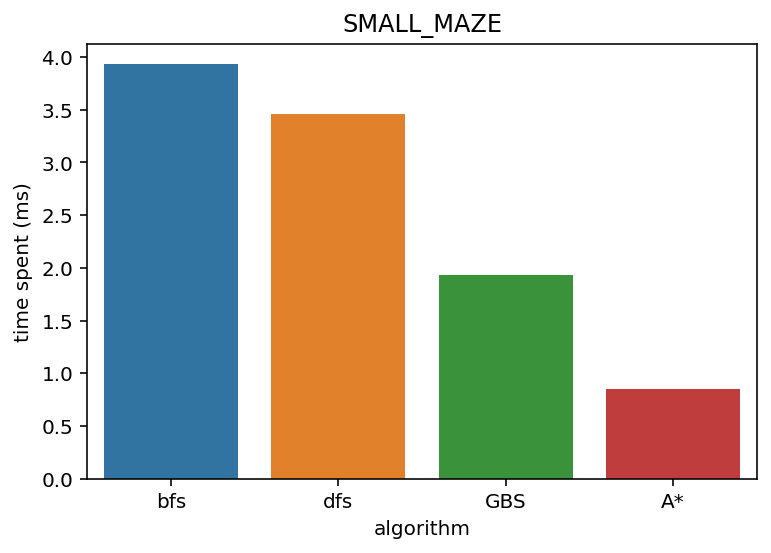

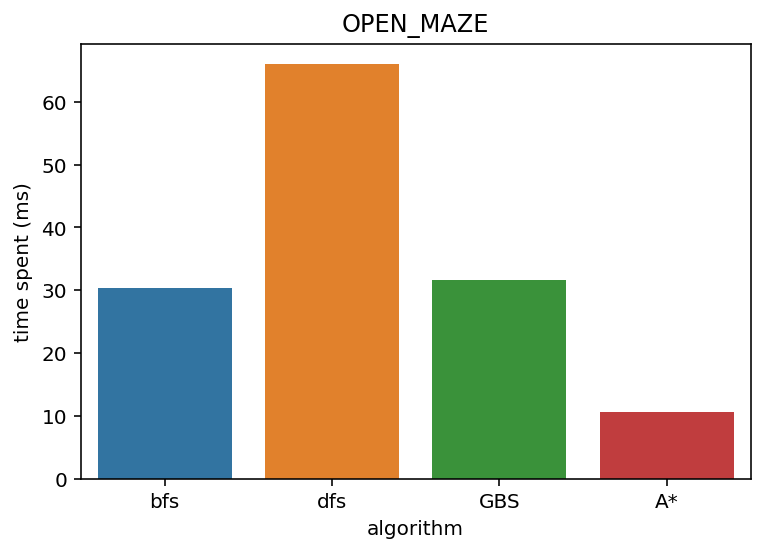

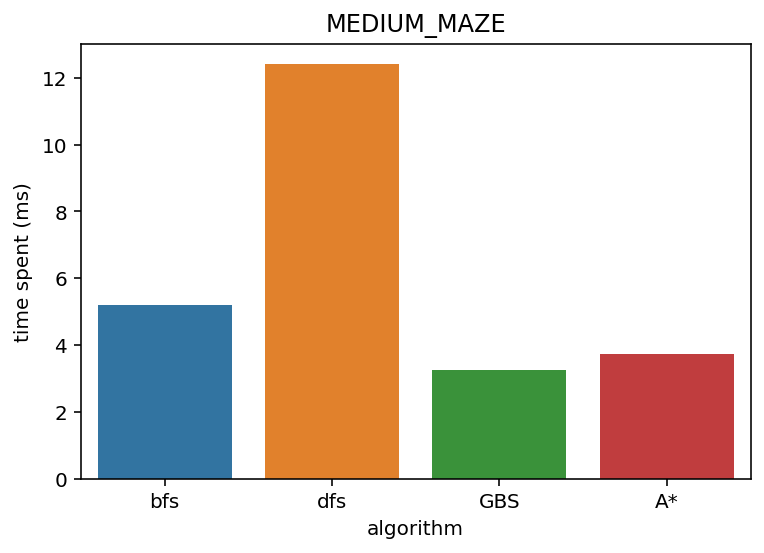

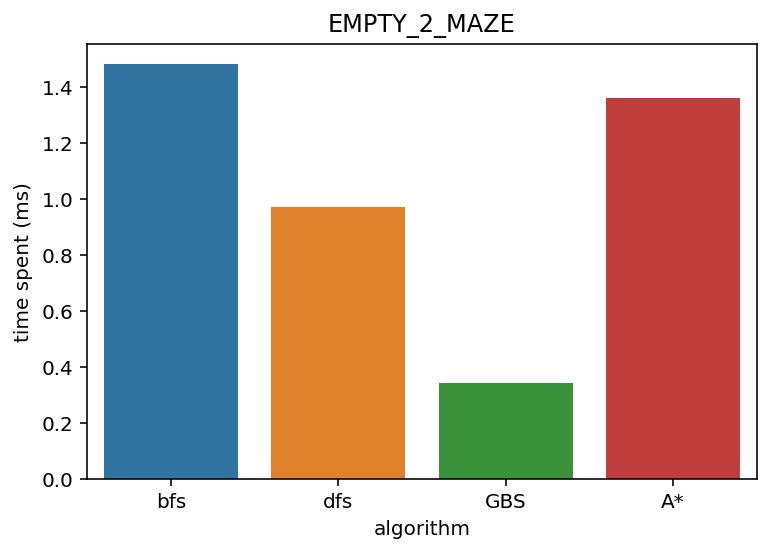

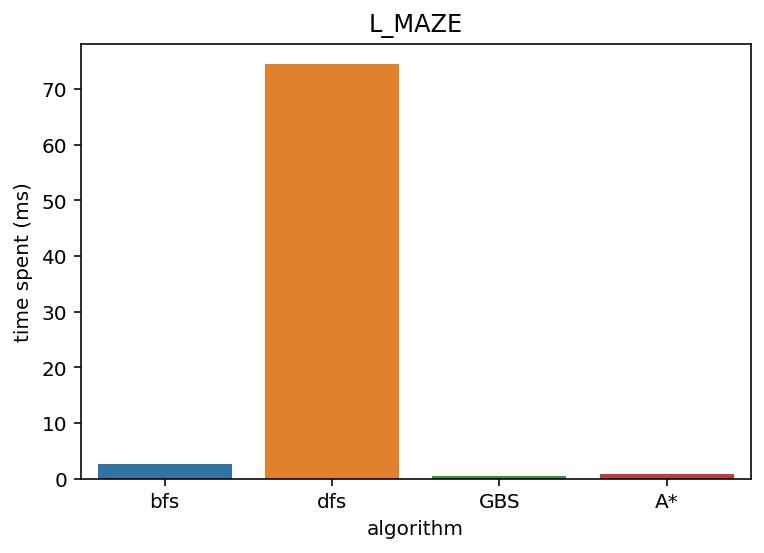

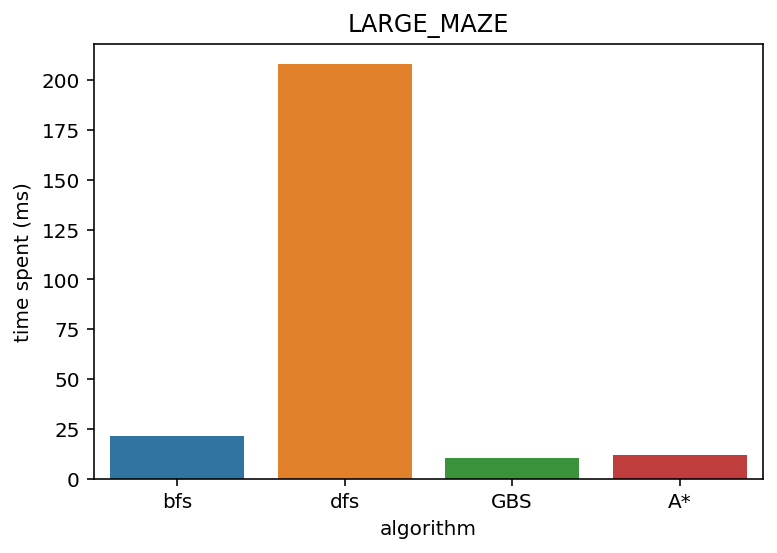

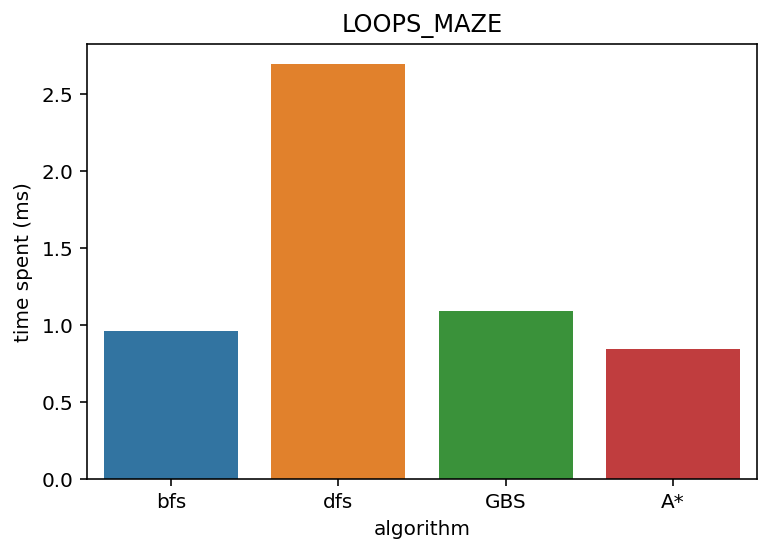

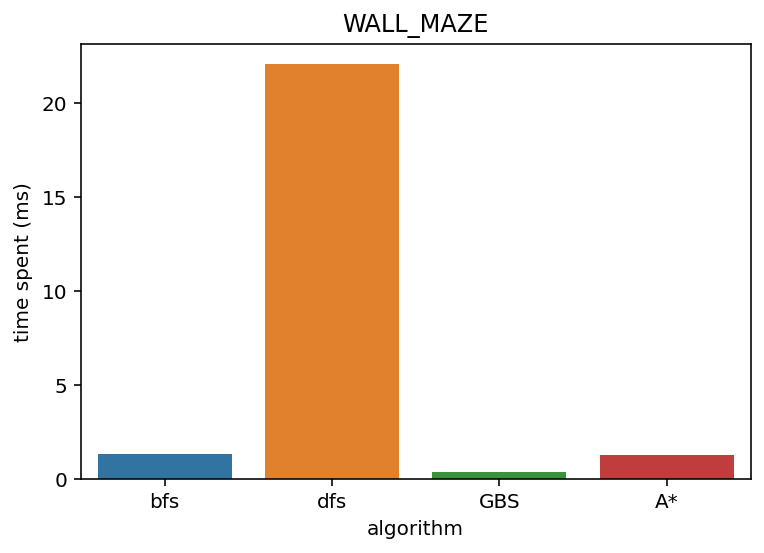

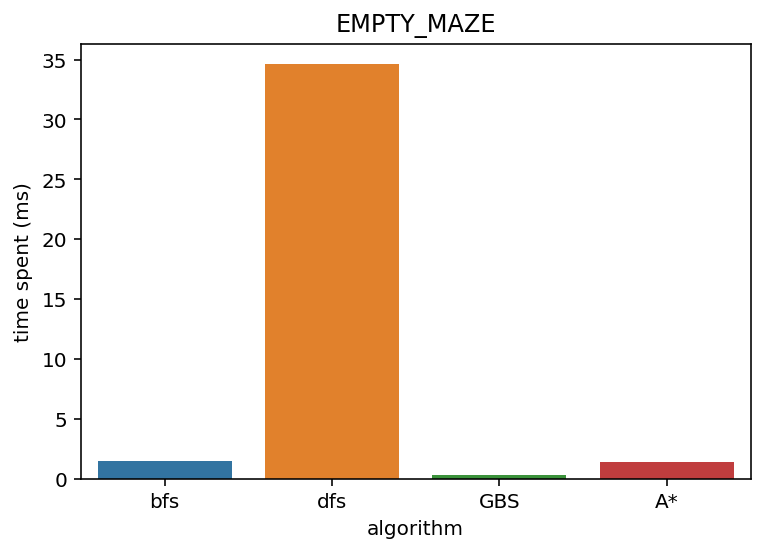

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

for key, val in all_dfs.items():
    # print(key)
    plt.figure()
    sns.barplot(data = val, x="algorithm", y="time spent (ms)").set(title=key)

    

In most cases it seems that dfs was the algo that the robot spent the most time trying to find the goal with. It was ineffective in the large mazes especially probably because it spent too long going specifically in the wrong direction. That is actually the case with most of these. Like even in the empty maze if it got lucky and went straight to the goal then it would've been able to reach it faster, but it didn't. BFS while it needed to visit the most nodes, it still didn't take as long because it still had a path going in the right direction to the node. Then GBS and A* were the fastest because of their heuristic nature in being able to go straight to the goal and limit the amount of unecessary visited nodes. 

MEDIUM_MAZE


[Text(0.5, 1.0, 'max frontier size')]

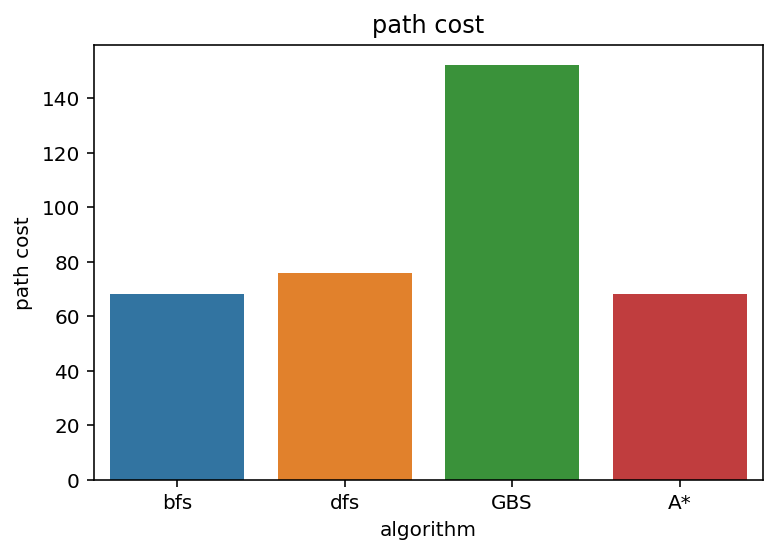

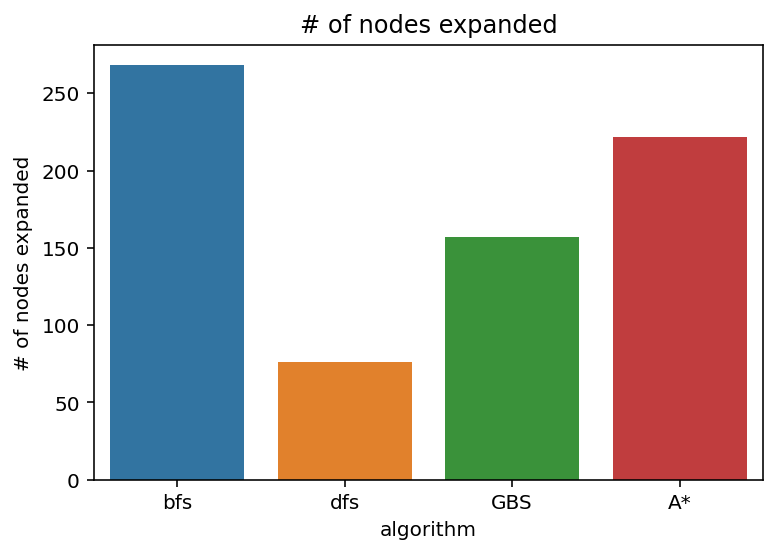

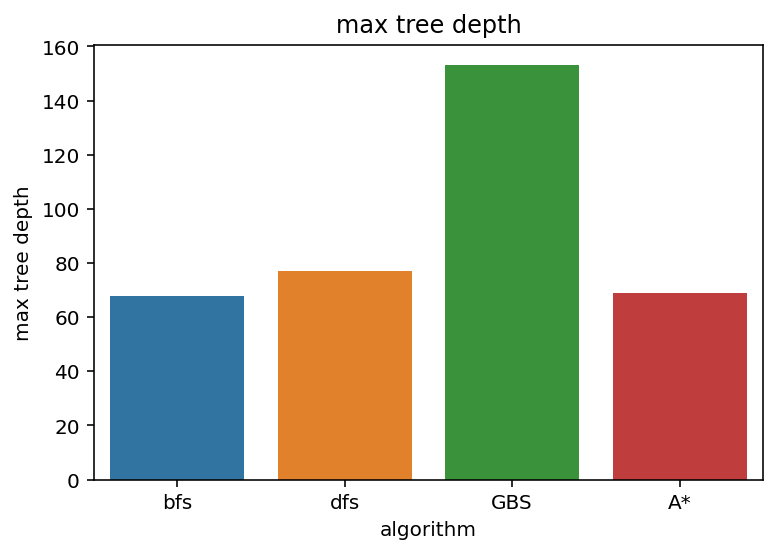

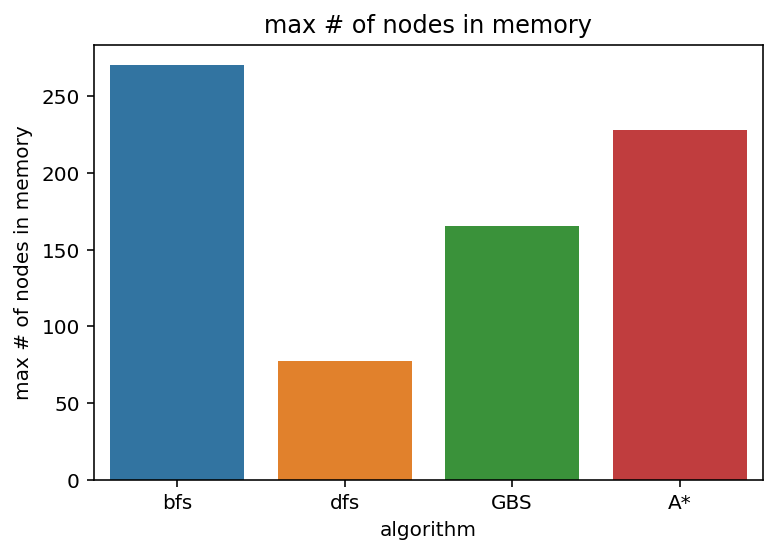

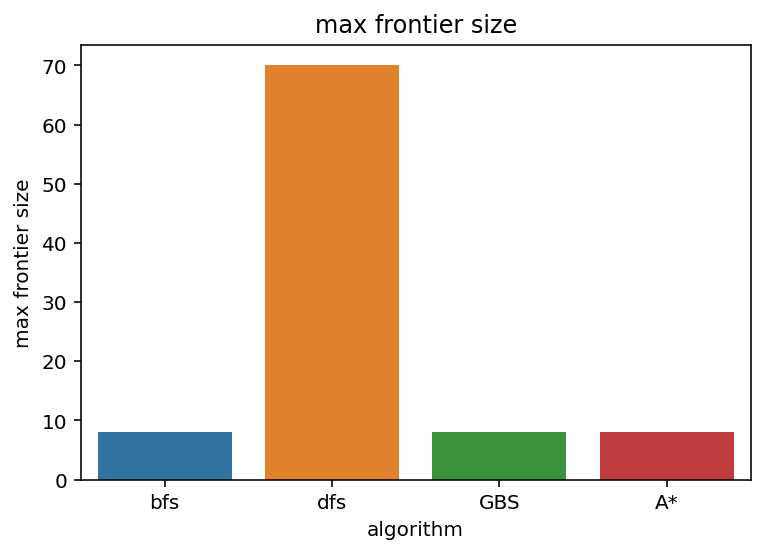

In [145]:
title = "MEDIUM_MAZE"
med_df = all_dfs[title]

print("MEDIUM_MAZE")
plt.figure()
sns.barplot(data = med_df, x="algorithm", y="path cost").set(title="path cost")
plt.figure()
sns.barplot(data = med_df, x="algorithm", y="# of nodes expanded").set(title="# of nodes expanded")
plt.figure()
sns.barplot(data = med_df, x="algorithm", y="max tree depth").set(title="max tree depth")
plt.figure()
sns.barplot(data = med_df, x="algorithm", y="max # of nodes in memory").set(title="max # of nodes in memory")
plt.figure()
sns.barplot(data = med_df, x="algorithm", y="max frontier size").set(title="max frontier size")


To further show the differences between the algos I decided to use the medium maze results. Oddly enough GBS took up the most path cost. This is probably due to it not being able to find the most efficient path with certainty in comparison to BFS. Nodes expanded obviously went to BFS as it visits the most nodes by expanding on every frontier. DFS has the least amount of nodes in memory as it focuses solely on the path and leaves out all other nodes (aside from frontier). Of course, frontier is left with the largest size in DFS because it has so much time to build up while DFS focuses on a single path.

Discuss the most important lessons you have learned from implementing the different search strategies. 

The most important lesson I have learned is how inefficient it is to focus on unecessary nodes. Why should the robot need to go visit nodes that are in the wrong direction when it can focus solely on the goal instead? Making such a simple change to BFS seems like a far more optimal choice in this case. I have also learning how lucky DFS really needs to be in order to become optimal. It shouldn't be used due to its inconsistency.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

BFS


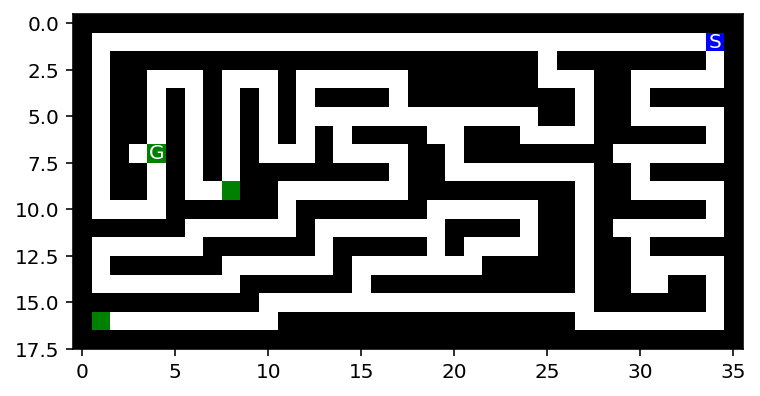

CPU times: user 3.63 ms, sys: 234 µs, total: 3.87 ms
Wall time: 4.36 ms


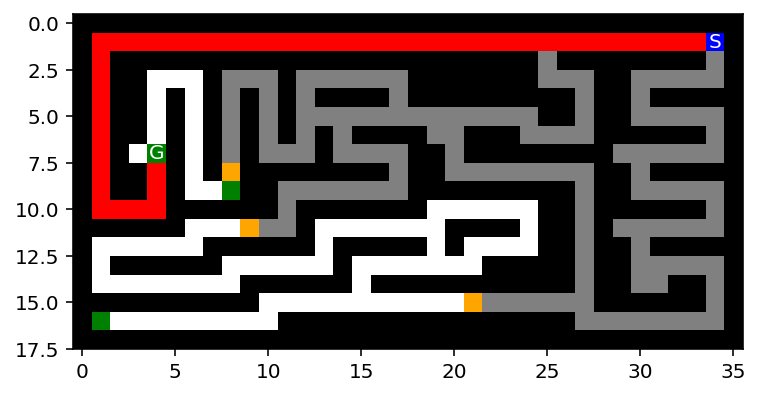

Node - pos = (7, 4); action = N; cost = 48
Start location: (1, 34)
Goal location: (7, 4)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N']


In [163]:
# Your code/answer goes here

import copy
with open("medium_maze2.txt", "r") as f:
    maze_str = f.read()

maze_og = mh.parse_maze(maze_str)
# mh.show_maze(maze_og)

print("BFS")

maze2 = copy.deepcopy(maze_og)
mh.show_maze(maze2)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = bfs(maze2, actions)


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze2[x.pos[0]][x.pos[1]] != "G" and maze2[x.pos[0]][x.pos[1]] != "S":
        maze2[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze2)

print(goal)
print("Start location:", mh.find_pos(maze2, what = "S"))
print("Goal location:", mh.find_pos(maze2, what = "G"))

print(path)



DFS


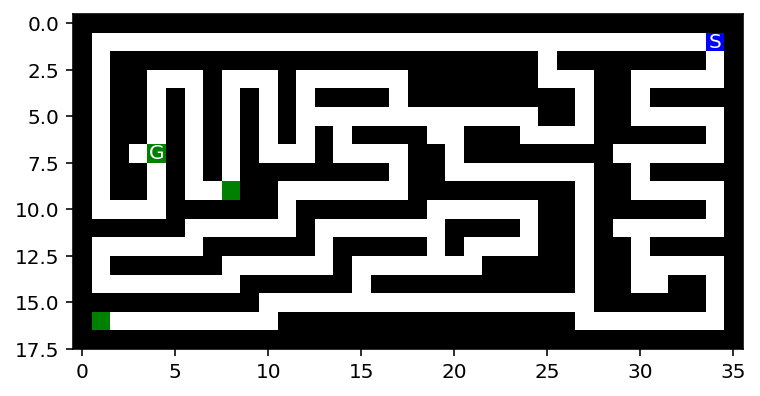

CPU times: user 12.4 ms, sys: 310 µs, total: 12.7 ms
Wall time: 16 ms


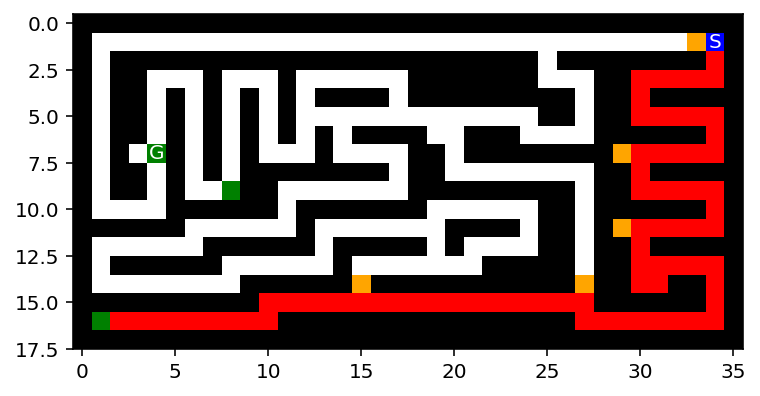

Node - pos = (16, 1); action = W; cost = 76
Start location: (1, 34)
Goal location: (7, 4)
[None, 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [167]:
print("DFS")

maze2 = copy.deepcopy(maze_og)
mh.show_maze(maze2)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = dfs(maze2, actions, 1000)


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze2[x.pos[0]][x.pos[1]] != "G" and maze2[x.pos[0]][x.pos[1]] != "S":
        maze2[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze2)

print(goal)
print("Start location:", mh.find_pos(maze2, what = "S"))
print("Goal location:", mh.find_pos(maze2, what = "G"))

print(path)


GBS


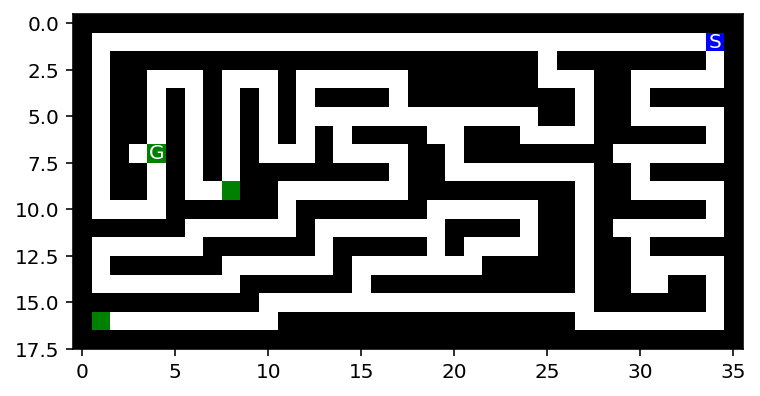

CPU times: user 736 µs, sys: 45 µs, total: 781 µs
Wall time: 775 µs


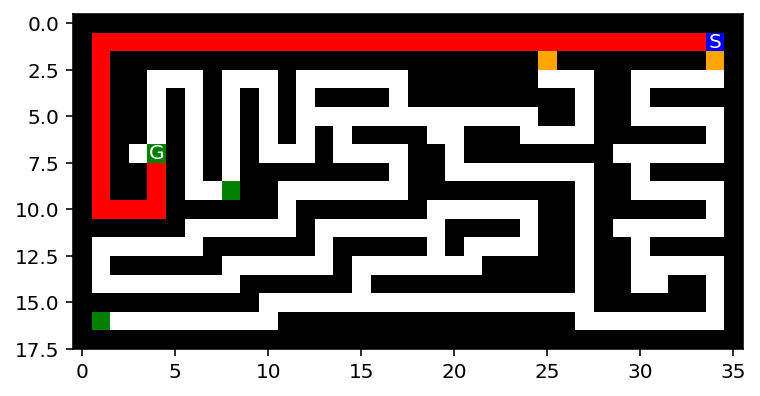

Node - pos = (7, 4); action = N; cost = 48
Start location: (1, 34)
Goal location: (7, 4)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N']


In [168]:
print("GBS")

maze2 = copy.deepcopy(maze_og)
mh.show_maze(maze2)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze2, actions)


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze2[x.pos[0]][x.pos[1]] != "G" and maze2[x.pos[0]][x.pos[1]] != "S":
        maze2[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze2)

print(goal)
print("Start location:", mh.find_pos(maze2, what = "S"))
print("Goal location:", mh.find_pos(maze2, what = "G"))

print(path)


A*


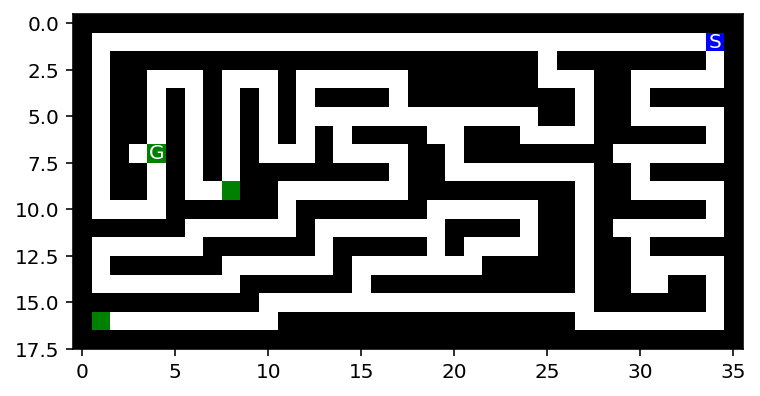

CPU times: user 2.07 ms, sys: 329 µs, total: 2.4 ms
Wall time: 2.86 ms


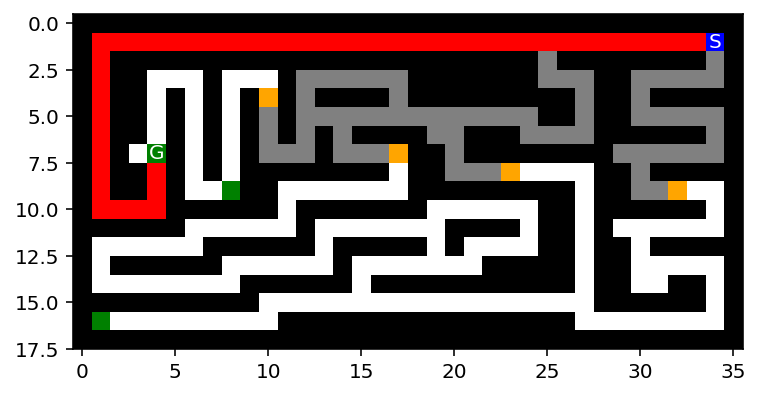

Node - pos = (7, 4); action = N; cost = 48
Start location: (1, 34)
Goal location: (7, 4)
[None, 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N']


In [169]:
print("A*")

maze2 = copy.deepcopy(maze_og)
mh.show_maze(maze2)

%time goal, max_front_size, max_reached, max_depth, nodes_expanded = informed_search(maze2, actions, "A*")


path = []

for x in goal.get_path_from_root():
    path.append(x.action)
    if maze2[x.pos[0]][x.pos[1]] != "G" and maze2[x.pos[0]][x.pos[1]] != "S":
        maze2[x.pos[0]][x.pos[1]] = "P"

mh.show_maze(maze2)

print(goal)
print("Start location:", mh.find_pos(maze2, what = "S"))
print("Goal location:", mh.find_pos(maze2, what = "G"))

print(path)

Both GBS and A* both focused on the closest possible goal. While the one they got to was farther than the one they were aiming for initially, they still ended up with the fastest and most efficient solution. DFS was just bad and went to the farthest one by its own "luck". Whereas BFS just found the closest possible one through iteration. In the end, GBS and A* are the best algos to use as they are the most consistent in finding the goal without needing to visit unnecessary nodes.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [18]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [19]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [20]:
# Your code/answer goes here